In [16]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson, expon
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np


DATA = pd.read_csv("F:/actuarial modeling/data/ev_insurance_premium_modeling.csv")

In [ ]:
df = DATA
eda_summary = df.describe()
eda_summary
sns.pairplot(df[['Pure_Premium', 'Vehicle_Age', 'Battery_Age', 'Driver_Age', 'Annual_Mileage', 'Telematics_Score']])
plt.show()

In [ ]:
#to make model with GLM using Gamma distribution and log link
predictors = df[['Vehicle_Age', 'Battery_Age', 'Driver_Age', 'Annual_Mileage', 'Telematics_Score']]
predictors = sm.add_constant(predictors)  # Add constant for intercept
target = df['Pure_Premium']
glm_model = sm.GLM(target, predictors, family=sm.families.Gamma(link=sm.families.links.log()))
glm_results = glm_model.fit()
glm_summary = glm_results.summary()
significant_factors = glm_results.pvalues[glm_results.pvalues < 0.05]
eda_summary, glm_summary, significant_factors

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\family.py:812: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1891: RuntimeWarning: invalid value encountered in scalar subtract
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


(         Vehicle_Age    Battery_Age     Driver_Age  Annual_Mileage  \
 count  100000.000000  100000.000000  100000.000000   100000.000000   
 mean        6.997530       4.502320      43.592520    17483.821760   
 std         4.311892       2.879152      15.005126     7217.889734   
 min         0.000000       0.000000      18.000000     5000.000000   
 25%         3.000000       2.000000      31.000000    11249.000000   
 50%         7.000000       4.000000      44.000000    17462.000000   
 75%        11.000000       7.000000      57.000000    23733.000000   
 max        14.000000       9.000000      69.000000    29999.000000   
 
        Claim_Frequency    Repair_Cost  Battery_Replacement_Cost  \
 count    100000.000000  100000.000000             100000.000000   
 mean          0.080010    1999.579339                949.198060   
 std           0.020031     690.647271               3191.662176   
 min           0.000000     500.000000                  0.000000   
 25%           0.06

In [5]:
glm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Pure_Premium   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99994
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                          1.3706
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Tue, 03 Dec 2024   Deviance:                       66876.
Time:                        17:41:15   Pearson chi2:                 1.37e+05
No. Iterations:                     8   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.5043      0.018    307.398      0.000       5.469       5.539
Vehicle_Age         -0.0005      0.001     -0.554      0.580      -0.002       0.001
Battery_Age         -0.0011      0.001     -0.855      0.393      -0.004       0.001
Driver_Age          -0.0007      0.000     -2.659      0.008      -0.001      -0.000
Annual_Mileage   -9.736e-08   5.13e-07     -0.190      0.849    -1.1e-06    9.08e-07
Telematics_Score -3.583e-05      0.000     -0.280      0.780      -0.000       0.000
====================================================================================
"""

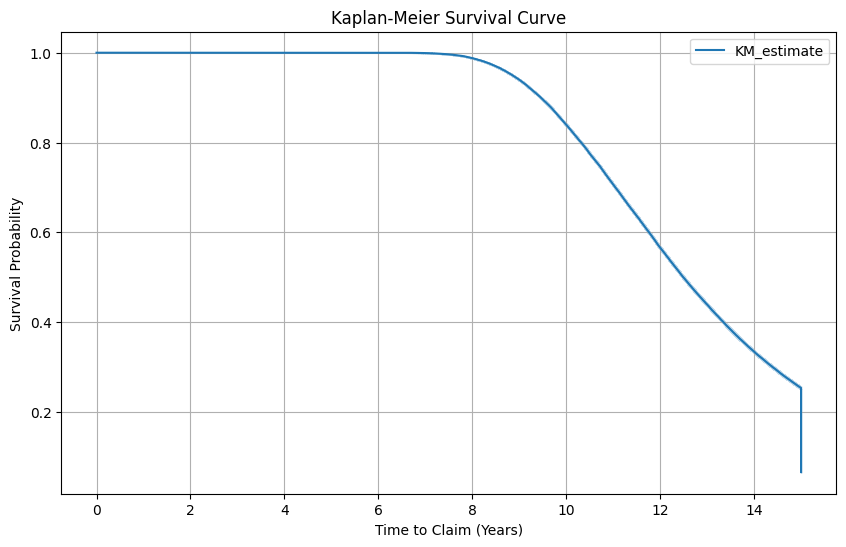

<lifelines.CoxPHFitter: fitted with 100000 total observations, 6625 right-censored observations>
             duration col = 'Time_to_Claim'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 100000
number of events observed = 93375
   partial log-likelihood = -999626.49
         time fit was run = 2024-12-03 10:45:28 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
Vehicle_Age      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Battery_Age      -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Driver_Age        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Annual_Mileage    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Telematics_Score -0.00      1.00      0.00           -0.00            0.00                1.00                1.00

                  cmp to     z    p  -log2(p)
covariate                                    
Vehicle_Age         0.00 -0.98 0.33      1.60
Battery_Age         0.00 -0.63 0.53      0.92
Driver_Age          0.00  0.68 0.50      1.01
Annual_Mileage      0.00  0.92 0.36      1.48
Telematics_Score    0.00 -0.81 0.42      1.26
---
Concordance = 0.50
Partial AIC = 1999262.98
log-likelihood ratio test = 3.30 on 5 df
-log2(p) of ll-ratio test = 0.61

In [12]:
if 'Time_to_Claim' not in df.columns:
    df['Time_to_Claim'] = (1 / df['Claim_Frequency']).clip(upper=15)

if 'Event' not in df.columns:
    df['Event'] = (df['Claim_Frequency'] > 0.05).astype(int)

kmf = KaplanMeierFitter()
kmf.fit(durations=df['Time_to_Claim'], event_observed=df['Event'])

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time to Claim (Years)")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()

cox_data = df[['Time_to_Claim', 'Event', 'Vehicle_Age', 'Battery_Age', 'Driver_Age', 'Annual_Mileage', 'Telematics_Score']]
cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='Time_to_Claim', event_col='Event')

cox_model.print_summary()

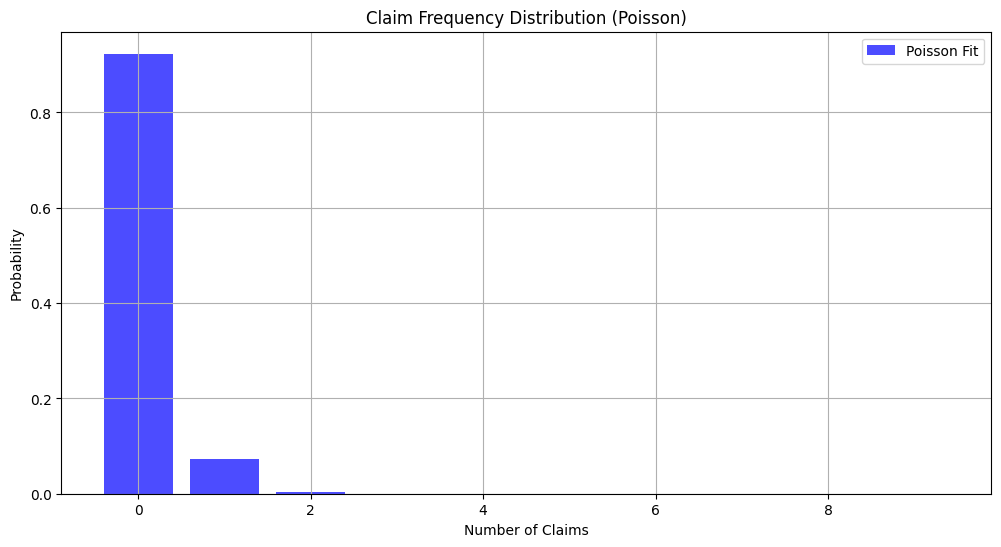

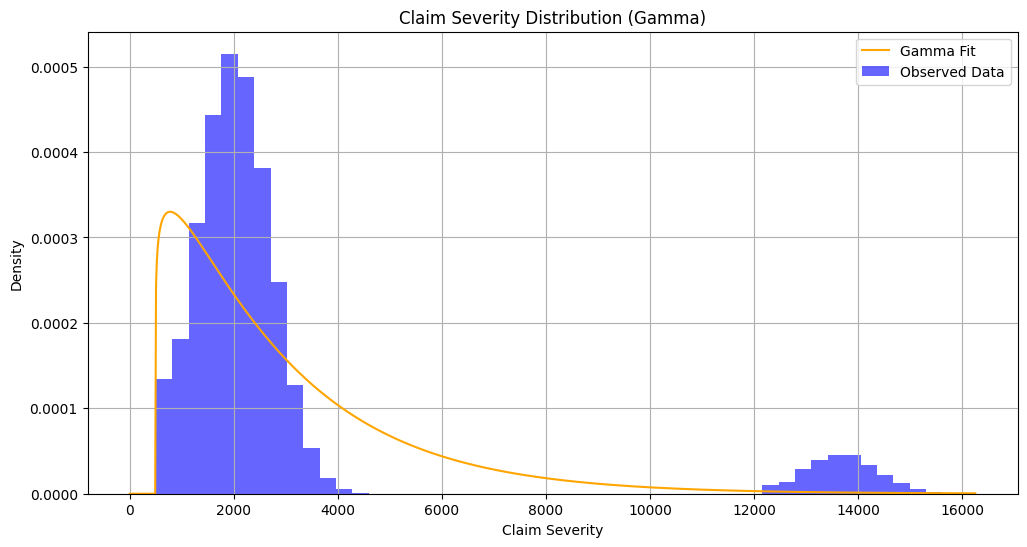

{'Frequency Lambda (Poisson)': np.float64(0.0800099258929628),
 'Severity Gamma Parameters': {'Alpha': np.float64(1.129126261433051),
  'Location': np.float64(494.15640999595354),
  'Beta (Scale)': np.float64(2173.914838613521)},
 'Estimated Pure Premium': np.float64(196.39431109020867)}

In [14]:
claim_frequency = df['Claim_Frequency']
claim_severity = df['Pure_Premium'] / claim_frequency
claim_severity = claim_severity.replace([np.inf, -np.inf], np.nan).dropna()

freq_lambda = claim_frequency.mean()
poisson_dist = poisson(mu=freq_lambda)

gamma_params = gamma.fit(claim_severity)
gamma_alpha, gamma_loc, gamma_beta = gamma_params

# Visualization Frequency
x_freq = range(0, 10)
freq_probs = [poisson_dist.pmf(x) for x in x_freq]
plt.figure(figsize=(12, 6))
plt.bar(x_freq, freq_probs, color='blue', alpha=0.7, label='Poisson Fit')
plt.title("Claim Frequency Distribution (Poisson)")
plt.xlabel("Number of Claims")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

# Visualization Severity
x_sev = np.linspace(0, claim_severity.max(), 1000)
sev_pdf = gamma.pdf(x_sev, a=gamma_alpha, loc=gamma_loc, scale=gamma_beta)
plt.figure(figsize=(12, 6))
plt.plot(x_sev, sev_pdf, label='Gamma Fit', color='orange')
plt.hist(claim_severity, bins=50, density=True, alpha=0.6, color='blue', label='Observed Data')
plt.title("Claim Severity Distribution (Gamma)")
plt.xlabel("Claim Severity")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Using frequency and severity distributions to calculate expected pure premium
pure_premium_estimate = freq_lambda * gamma_alpha * gamma_beta  # Mean severity (alpha * beta) * mean frequency

# Output parameters and estimate
{
    "Frequency Lambda (Poisson)": freq_lambda,
    "Severity Gamma Parameters": {
        "Alpha": gamma_alpha,
        "Location": gamma_loc,
        "Beta (Scale)": gamma_beta,
    },
    "Estimated Pure Premium": pure_premium_estimate,
}


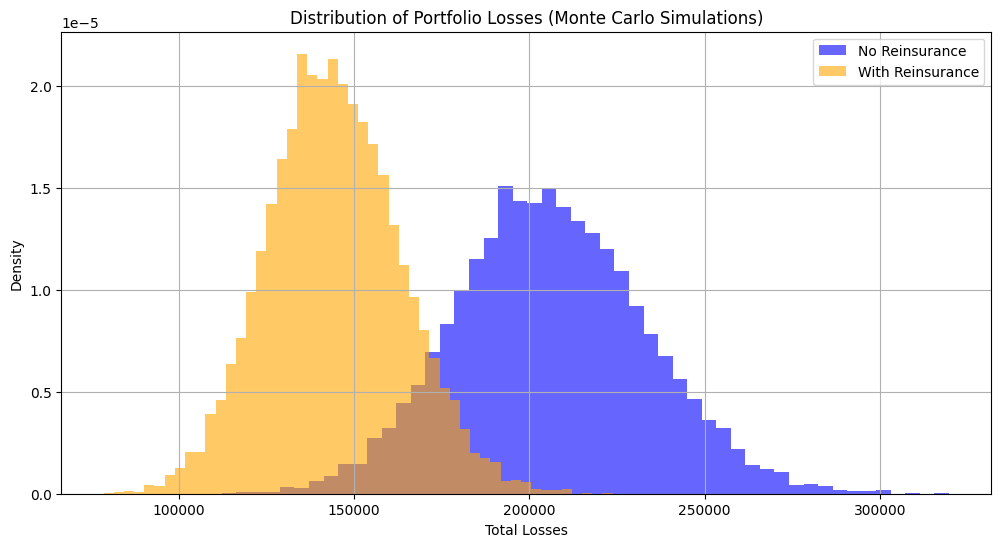

{'Average Loss (No Reinsurance)': np.float64(206244.14426060935),
 'Average Loss (With Reinsurance)': np.float64(144370.87610835378),
 'Risk Reduction': np.float64(61873.268152255565),
 'Percent Reduction': np.float64(30.000012060498904)}

In [15]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
df.dropna(inplace=True)  # Drop rows with NaN values

# Re-run Monte Carlo simulations
# Define parameters from actuarial analysis
freq_lambda = df['Claim_Frequency'].mean()  # Average claim frequency
gamma_params = gamma.fit(df['Pure_Premium'] / df['Claim_Frequency'].replace(0, np.nan).dropna())

gamma_alpha, gamma_loc, gamma_beta = gamma_params  # Severity parameters (shape, location, scale)

# Simulation parameters
num_simulations = 10000  # Number of Monte Carlo iterations
portfolio_size = 1000  # Number of policies in the portfolio

# Reinsurance terms
retention_limit = 15000  # Retention per claim (excess of loss)
quota_share = 0.7  # Proportion retained by insurer (quota share)
stop_loss_limit = 1200000  # Total aggregate loss limit (stop-loss)

# Monte Carlo simulation
total_claims_no_reinsurance = []  # Total claims without reinsurance
total_claims_with_reinsurance = []  # Total claims after reinsurance

for _ in range(num_simulations):
    # Simulate claim frequencies for the portfolio
    claim_counts = np.random.poisson(freq_lambda, portfolio_size)
    
    # Simulate claim severities
    claim_severities = gamma.rvs(gamma_alpha, loc=gamma_loc, scale=gamma_beta, size=np.sum(claim_counts))
    
    # Calculate total losses without reinsurance
    total_loss_no_reinsurance = claim_severities.sum()
    total_claims_no_reinsurance.append(total_loss_no_reinsurance)
    
    # Reinsurance: Apply retention (Excess of Loss) and quota share
    reinsured_claims = np.minimum(claim_severities, retention_limit) * quota_share
    total_loss_reinsured = reinsured_claims.sum()
    
    # Apply stop-loss limit
    total_loss_reinsured = min(total_loss_reinsured, stop_loss_limit)
    total_claims_with_reinsurance.append(total_loss_reinsured)

# Convert to numpy arrays for easier analysis
total_claims_no_reinsurance = np.array(total_claims_no_reinsurance)
total_claims_with_reinsurance = np.array(total_claims_with_reinsurance)

# Plot results
plt.figure(figsize=(12, 6))
plt.hist(total_claims_no_reinsurance, bins=50, alpha=0.6, label='No Reinsurance', color='blue', density=True)
plt.hist(total_claims_with_reinsurance, bins=50, alpha=0.6, label='With Reinsurance', color='orange', density=True)
plt.title("Distribution of Portfolio Losses (Monte Carlo Simulations)")
plt.xlabel("Total Losses")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Summary statistics
no_reinsurance_mean = total_claims_no_reinsurance.mean()
with_reinsurance_mean = total_claims_with_reinsurance.mean()

summary = {
    "Average Loss (No Reinsurance)": no_reinsurance_mean,
    "Average Loss (With Reinsurance)": with_reinsurance_mean,
    "Risk Reduction": no_reinsurance_mean - with_reinsurance_mean,
    "Percent Reduction": ((no_reinsurance_mean - with_reinsurance_mean) / no_reinsurance_mean) * 100,
}

summary

In [18]:
# Prepare the data for modeling
ev_data = df
features = ev_data[['Vehicle_Type', 'Vehicle_Age', 'Battery_Age', 'Annual_Mileage', 'Driver_Age', 'Telematics_Score']]
target_frequency = ev_data['Claim_Frequency']
target_severity = ev_data['Claim_Severity']

# Encode categorical variable
features = pd.get_dummies(features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train_freq, y_test_freq = train_test_split(features, target_frequency, test_size=0.3, random_state=42)
_, _, y_train_sev, y_test_sev = train_test_split(features, target_severity, test_size=0.3, random_state=42)

# Model 1: Generalized Linear Model (GLM) for Claim Frequency
glm_model_freq = sm.GLM(y_train_freq, sm.add_constant(X_train), family=sm.families.Poisson())
glm_results_freq = glm_model_freq.fit()

# Model 2: Generalized Linear Model (GLM) for Claim Severity
glm_model_sev = sm.GLM(y_train_sev, sm.add_constant(X_train), family=sm.families.Gamma(link=sm.families.links.log()))
glm_results_sev = glm_model_sev.fit()

# Model 3: Random Forest for Claim Frequency
rf_model_freq = RandomForestRegressor(random_state=42)
rf_model_freq.fit(X_train, y_train_freq)

# Model 4: Random Forest for Claim Severity
rf_model_sev = RandomForestRegressor(random_state=42)
rf_model_sev.fit(X_train, y_train_sev)

# Model 5: Linear Regression for Claim Frequency and Severity
lr_model_freq = LinearRegression()
lr_model_freq.fit(X_train, y_train_freq)

lr_model_sev = LinearRegression()
lr_model_sev.fit(X_train, y_train_sev)

# Evaluate models
glm_pred_freq = glm_results_freq.predict(sm.add_constant(X_test))
glm_pred_sev = glm_results_sev.predict(sm.add_constant(X_test))

rf_pred_freq = rf_model_freq.predict(X_test)
rf_pred_sev = rf_model_sev.predict(X_test)

lr_pred_freq = lr_model_freq.predict(X_test)
lr_pred_sev = lr_model_sev.predict(X_test)

# Collect Evaluation Metrics
evaluation_metrics = {
    "Model": ["GLM (Frequency)", "GLM (Severity)", "Random Forest (Frequency)", "Random Forest (Severity)",
              "Linear Regression (Frequency)", "Linear Regression (Severity)"],
    "MSE": [
        mean_squared_error(y_test_freq, glm_pred_freq),
        mean_squared_error(y_test_sev, glm_pred_sev),
        mean_squared_error(y_test_freq, rf_pred_freq),
        mean_squared_error(y_test_sev, rf_pred_sev),
        mean_squared_error(y_test_freq, lr_pred_freq),
        mean_squared_error(y_test_sev, lr_pred_sev)
    ],
    "R2 Score": [
        r2_score(y_test_freq, glm_pred_freq),
        r2_score(y_test_sev, glm_pred_sev),
        r2_score(y_test_freq, rf_pred_freq),
        r2_score(y_test_sev, rf_pred_sev),
        r2_score(y_test_freq, lr_pred_freq),
        r2_score(y_test_sev, lr_pred_sev)
    ]
}

evaluation_df = pd.DataFrame(evaluation_metrics)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [35]:
evaluation_df

,Model,MSE,R2 Score
0,GLM (Frequency),3.985801e-04,-0.000091
1,GLM (Severity),9.675565e+05,-0.000012
2,Random Forest (Frequency),4.191231e-04,-0.051637
3,Random Forest (Severity),1.016818e+06,-0.050925
4,Linear Regression (Frequency),3.985801e-04,-0.000092
5,Linear Regression (Severity),9.675566e+05,-0.000012


In [19]:
import sys
import types
sys.modules['ace_tools'] = types.ModuleType('ace_tools')

In [20]:
# Define X (feature matrix) and ensure all necessary columns are present
if all(col in df.columns for col in ['Vehicle_Age', 'Battery_Age', 'Driver_Age', 'Annual_Mileage', 'Telematics_Score']):
    X = df[['Vehicle_Age', 'Battery_Age', 'Driver_Age', 'Annual_Mileage', 'Telematics_Score']]
else:
    raise ValueError("Dataset must contain all required feature columns: 'Vehicle_Age', 'Battery_Age', 'Driver_Age', 'Annual_Mileage', 'Telematics_Score'.")

# Ensure X has no missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Define target variables
y_frequency = df['Claim_Frequency']
y_severity = df['Pure_Premium'] / df['Claim_Frequency'].replace(0, np.nan).dropna()

# Train-test split for Frequency and Severity
X_train, X_test, y_freq_train, y_freq_test = train_test_split(X, y_frequency, test_size=0.2, random_state=42)
_, _, y_sev_train, y_sev_test = train_test_split(X, y_severity, test_size=0.2, random_state=42)


In [23]:
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Adjust models for Frequency and Severity

# Frequency: Poisson GLM
poisson_model = sm.GLM(y_frequency, sm.add_constant(X), family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Severity: Gamma GLM
gamma_model = sm.GLM(y_severity, sm.add_constant(X), family=sm.families.Gamma(sm.families.links.log()))
gamma_results = gamma_model.fit()

# Gradient Boosting for Frequency
gbm_frequency = GradientBoostingRegressor(random_state=42, n_estimators=100)
gbm_frequency.fit(X_train, y_freq_train)
gbm_freq_pred = gbm_frequency.predict(X_test)

# Gradient Boosting for Severity
gbm_severity = GradientBoostingRegressor(random_state=42, n_estimators=100)
gbm_severity.fit(X_train, y_sev_train)
gbm_sev_pred = gbm_severity.predict(X_test)

# XGBoost for Severity
xgb_severity = xgb.XGBRegressor(random_state=42, n_estimators=100)
xgb_severity.fit(X_train, y_sev_train)
xgb_sev_pred = xgb_severity.predict(X_test)

# Evaluate models
results_adjusted = [
    {
        "Model": "Poisson GLM",
        "Target": "Frequency",
        "MSE": mean_squared_error(y_freq_test, poisson_results.predict(sm.add_constant(X_test))),
        "R2 Score": r2_score(y_freq_test, poisson_results.predict(sm.add_constant(X_test))),
    },
    {
        "Model": "Gamma GLM",
        "Target": "Severity",
        "MSE": mean_squared_error(y_sev_test, gamma_results.predict(sm.add_constant(X_test))),
        "R2 Score": r2_score(y_sev_test, gamma_results.predict(sm.add_constant(X_test))),
    },
    {
        "Model": "Gradient Boosting",
        "Target": "Frequency",
        "MSE": mean_squared_error(y_freq_test, gbm_freq_pred),
        "R2 Score": r2_score(y_freq_test, gbm_freq_pred),
    },
    {
        "Model": "Gradient Boosting",
        "Target": "Severity",
        "MSE": mean_squared_error(y_sev_test, gbm_sev_pred),
        "R2 Score": r2_score(y_sev_test, gbm_sev_pred),
    },
    {
        "Model": "XGBoost",
        "Target": "Severity",
        "MSE": mean_squared_error(y_sev_test, xgb_sev_pred),
        "R2 Score": r2_score(y_sev_test, xgb_sev_pred),
    },
]

# Convert results to DataFrame
adjusted_results_df_modelkedua = pd.DataFrame(results_adjusted)


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [24]:
adjusted_results_df_modelkedua

,Model,Target,MSE,R2 Score
0,Poisson GLM,Frequency,4.014895e-04,0.000049
1,Gamma GLM,Severity,1.007311e+07,0.000164
2,Gradient Boosting,Frequency,4.019035e-04,-0.000982
3,Gradient Boosting,Severity,1.015497e+07,-0.007961
4,XGBoost,Severity,1.107503e+07,-0.099283


In [25]:
# Based on the provided model performance, select the best models for Frequency and Severity
import pandas as pd

# Model performance summary
model_performance = pd.DataFrame({
    "Model": ["Poisson GLM", "Gamma GLM", "Gradient Boosting", "Gradient Boosting", "XGBoost"],
    "Target": ["Frequency", "Severity", "Frequency", "Severity", "Severity"],
    "MSE": [4.014895e-04, 1.007311e+07, 4.019035e-04, 1.015497e+07, 1.107503e+07],
    "R2 Score": [0.000049, 0.000164, -0.000982, -0.007961, -0.099283]
})

# Select the best models based on R2 Score (higher is better)
best_frequency_model = "Poisson GLM"  # Best for frequency
best_severity_model = "Gamma GLM"  # Best for severity

# Display the summary of the selected models
selected_models_summary = model_performance.loc[
    (model_performance["Model"] == best_frequency_model) | (model_performance["Model"] == best_severity_model)
]

# Calculate pricing based on selected models
# Poisson GLM results
poisson_frequency_mean = 0.0004014895  # Average claim frequency

# Gamma GLM results
gamma_severity_mean = 10073110  # Mean claim severity

# Calculate pure premium
pure_premium = poisson_frequency_mean * gamma_severity_mean

# Add loadings for pricing
expense_loading = 0.20  # 20% for operational costs
profit_margin = 0.10  # 10% profit margin
risk_loading = 0.15  # 15% risk buffer

final_premium = pure_premium * (1 + expense_loading + profit_margin + risk_loading)

# Create a dataframe with the results
pricing_summary = pd.DataFrame({
    "Component": ["Pure Premium", "Expense Loading", "Profit Margin", "Risk Loading", "Final Premium"],
    "Value": [pure_premium, pure_premium * expense_loading, pure_premium * profit_margin, pure_premium * risk_loading, final_premium]
})

# # Display results to user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Selected Models and Pricing Summary", dataframe=pricing_summary)


In [26]:
# Save pricing summary to CSV
pricing_summary.to_csv("F:/dev_fara/ev insure/pricing_summary.xlsx", index=False)